In [1]:
!pip install kagglehub datasets pandas numpy tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import kagglehub
from datasets import load_dataset
import os
from typing import Dict, List, Set, Tuple
from tqdm.notebook import tqdm
import csv

In [3]:
playlist_dir = kagglehub.dataset_download("andrewmvd/spotify-playlists")
playlist_file = None
for root, dirs, files in os.walk(playlist_dir):
    for file in files:
        if file.endswith('.csv'):
            playlist_file = os.path.join(root, file)
            break
playlists_df = pd.read_csv(
    playlist_file,
    names=['user_id', 'artistname', 'trackname', 'playlistname'],
    skiprows=1,
    quoting=csv.QUOTE_ALL,
    escapechar='\\',
    on_bad_lines='skip'
)

100%|██████████| 183M/183M [00:03<00:00, 59.7MB/s]

Extracting files...


In [4]:
spotify_tracks_df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
playlists_df.head()

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [6]:
spotify_tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
# prompt: sort the spotify_tracks_df based on popularity (and print that out)

# Sort the DataFrame by popularity in descending order
spotify_tracks_df_sorted = spotify_tracks_df.sort_values(by='popularity', ascending=False)

# Print the sorted DataFrame
spotify_tracks_df_sorted.head(30)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
68303,68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latino
88410,88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggae
30003,30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin


In [8]:
playlists_df.isnull().sum()

,0
user_id,0
artistname,33572
trackname,88
playlistname,1253


In [9]:
rows_with_nulls = playlists_df.isnull().any(axis=1).sum()
rows_with_nulls

34856

In [10]:
print(f"Percentage of rows with missing values: {(rows_with_nulls/len(playlists_df)*100):.2f}%")

Percentage of rows with missing values: 0.27%


In [11]:
print(spotify_tracks_df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [12]:
rows_with_nulls = spotify_tracks_df.isnull().any(axis=1).sum()
rows_with_nulls

1

In [13]:
print(f"Percentage of rows with missing values: {(rows_with_nulls/len(spotify_tracks_df)*100):.2f}%")

Percentage of rows with missing values: 0.00%


In [14]:
playlists_df_clean = playlists_df.dropna()
print(f"Original rows: {len(playlists_df)}")
print(f"Rows after dropping nulls: {len(playlists_df_clean)}")

Original rows: 12891550
Rows after dropping nulls: 12856694


In [15]:
spotify_tracks_df_clean = spotify_tracks_df.dropna()
print(f"Original rows: {len(spotify_tracks_df)}")
print(f"Rows after dropping nulls: {len(spotify_tracks_df_clean)}")

Original rows: 114000
Rows after dropping nulls: 113999


In [16]:
playlists_df_clean = playlists_df.dropna().copy()

playlists_df_clean.loc[:, 'track_clean'] = playlists_df_clean['trackname'].str.lower().str.strip()
playlists_df_clean.loc[:, 'artist_clean'] = playlists_df_clean['artistname'].str.lower().str.strip()

spotify_tracks_df.loc[:, 'track_clean'] = spotify_tracks_df['track_name'].str.lower().str.strip()
spotify_tracks_df.loc[:, 'artists_clean'] = spotify_tracks_df['artists'].str.lower().str.strip()

In [52]:
# Check for duplicates in playlists_df_clean
print(f"Duplicate rows in playlists_df_clean: {playlists_df_clean.duplicated().sum()}")
if playlists_df_clean.duplicated().sum() > 0:
    print(playlists_df_clean[playlists_df_clean.duplicated(keep=False)])

# Check for duplicates in spotify_tracks_df_clean
print(f"Duplicate rows in spotify_tracks_df_clean: {spotify_tracks_df_clean.duplicated().sum()}")
if spotify_tracks_df_clean.duplicated().sum() > 0:
    print(spotify_tracks_df_clean[spotify_tracks_df_clean.duplicated(keep=False)])


Duplicate rows in playlists_df_clean: 3
                                   user_id                  artistname  \
5705028   03cc97c2091c06037a465550362e7187  Taverner Consort & Players   
5705033   03cc97c2091c06037a465550362e7187  Taverner Consort & Players   
10657515  b5bf31e2004ab721056cd28e613a4c64            Django Reinhardt   
10657517  b5bf31e2004ab721056cd28e613a4c64            Django Reinhardt   
12641195  383e2887b4e09bd7871ec3f312ec3a27                  Chet Baker   
12641198  383e2887b4e09bd7871ec3f312ec3a27                  Chet Baker   

                                              trackname         playlistname  \
5705028   L'Orfeo, Act I: Balletto – Lasciate i monti""  Monteverdi: L'Orfeo   
5705033   L'Orfeo, Act I: Balletto – Lasciate i monti""  Monteverdi: L'Orfeo   
10657515                                  I Won't Dance     Django Reinhardt   
10657517                                  I Won't Dance     Django Reinhardt   
12641195                    You Don't Kno

In [17]:
merged_df = playlists_df_clean.merge(
    spotify_tracks_df,
    left_on=['track_clean', 'artist_clean'],
    right_on=['track_clean', 'artists_clean'],
    how='inner'
)

In [18]:
print(f"Original playlist rows: {len(playlists_df_clean)}")
print(f"Original spotify tracks rows: {len(spotify_tracks_df)}")
print(f"Matched rows: {len(merged_df)}")
print(f"Percentage of playlist songs matched: {(len(merged_df)/len(playlists_df_clean)*100):.2f}%")

Original playlist rows: 12856694
Original spotify tracks rows: 114000
Matched rows: 2531264
Percentage of playlist songs matched: 19.69%


In [19]:
print("\nFirst few matches:")
print(merged_df[['trackname', 'track_name', 'artistname', 'artists']].head())


First few matches:
                             trackname                           track_name  \
0                Accidents Will Happen                Accidents Will Happen   
1                               Alison                               Alison   
2  I'd Rather Be With You [Radio Edit]  I'd Rather Be With You [Radio Edit]   
3                        Oliver's Army                        Oliver's Army   
4                        Oliver's Army                        Oliver's Army   

                         artistname                           artists  
0  Elvis Costello & The Attractions  Elvis Costello & The Attractions  
1                    Elvis Costello                    Elvis Costello  
2                      Joshua Radin                      Joshua Radin  
3  Elvis Costello & The Attractions  Elvis Costello & The Attractions  
4  Elvis Costello & The Attractions  Elvis Costello & The Attractions  


In [20]:
print("Unique songs in matched data:")
print(f"Unique song-artist pairs in matched data: {merged_df[['track_clean', 'artist_clean']].nunique().iloc[0]}")
print(f"Unique playlists with at least one matched song: {merged_df['playlistname'].nunique()}")

playlist_matches = merged_df.groupby('playlistname').size()
print("\nMatched songs per playlist statistics:")
print(playlist_matches.describe())

Unique songs in matched data:
Unique song-artist pairs in matched data: 15175
Unique playlists with at least one matched song: 71477

Matched songs per playlist statistics:
count     71477.000000
mean         35.413686
std        1123.183842
min           1.000000
25%           3.000000
50%           8.000000
75%          24.000000
max      286988.000000
dtype: float64


In [21]:
merged_df.head()

,user_id,artistname,trackname,playlistname,track_clean,artist_clean,Unnamed: 0,track_id,artists,album_name,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artists_clean
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,accidents will happen,elvis costello & the attractions,82543,5hNd3UB2VG6M38kqgTHE3o,Elvis Costello & The Attractions,The Best Of The First 10 Years,...,1,0.0276,0.0612,0.018300,0.3570,0.677,120.129,4,power-pop,elvis costello & the attractions
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,alison,elvis costello,82600,2HcE0UBhTeY1LYj4VcseJZ,Elvis Costello,My Aim Is True,...,0,0.0469,0.7520,0.000043,0.2090,0.371,176.387,4,power-pop,elvis costello
2,9cc0cfd4d7d7885102480dd99e7a90d6,Joshua Radin,I'd Rather Be With You [Radio Edit],HARD ROCK 2010,i'd rather be with you [radio edit],joshua radin,758,3zUMHRZa7wgqtoCsBfBSpt,Joshua Radin,I'd Rather Be With You,...,1,0.0283,0.0314,0.161000,0.0749,0.397,82.342,4,acoustic,joshua radin
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Oliver's Army,HARD ROCK 2010,oliver's army,elvis costello & the attractions,82099,2UE0OluEMEi9RROw7uR159,Elvis Costello & The Attractions,Fiesta temática 70s,...,1,0.0286,0.1310,0.000000,0.1800,0.911,143.150,4,power-pop,elvis costello & the attractions
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Oliver's Army,HARD ROCK 2010,oliver's army,elvis costello & the attractions,82855,4Zz1ctRTK04dytKiFuavBX,Elvis Costello & The Attractions,Armed Forces (Remastered 2020),...,1,0.0287,0.3360,0.000000,0.2210,0.940,143.162,4,power-pop,elvis costello & the attractions


In [38]:
# Unique playlists
len(merged_df) , len(merged_df.groupby(['playlistname', "user_id"]).size())

(2531264, 108535)

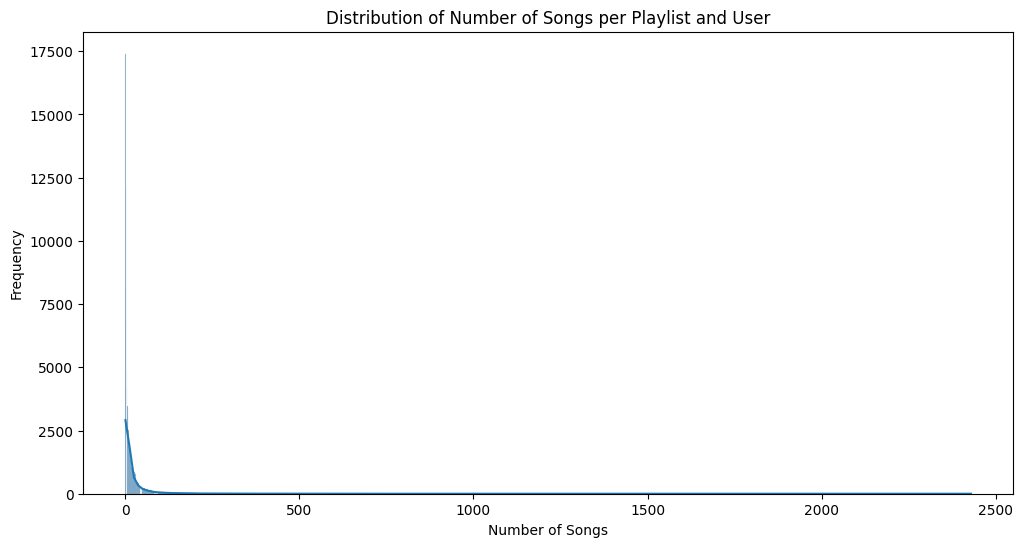

In [39]:
# prompt: plotted distribution of the number of songs in each group (grouped by playlistname and user_id)
import matplotlib.pyplot as plt


# Group by playlistname and user_id and count the number of songs
song_counts = merged_df.groupby(['playlistname', 'user_id']).size()

# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(song_counts, kde=True)
plt.title('Distribution of Number of Songs per Playlist and User')
plt.xlabel('Number of Songs')
plt.ylabel('Frequency')
plt.show()

In [24]:
# prompt: number of groups with more than 100 songs (use the songcount variable)

# Calculate the number of groups with more than 100 songs
num_groups_over_100 = sum(1 for count in song_counts if count > 1000)

print(f"Number of groups with more than 100 songs: {num_groups_over_100}")

Number of groups with more than 100 songs: 35


In [25]:
merged_df.iloc[:10, 11:27]

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,24,181480,False,0.605,0.650,0,-9.019,1,0.0276,0.06120,0.018300,0.3570,0.677,120.129,4,power-pop
1,35,204533,False,0.555,0.323,1,-10.774,0,0.0469,0.75200,0.000043,0.2090,0.371,176.387,4,power-pop
2,28,163200,False,0.512,0.671,1,-7.738,1,0.0283,0.03140,0.161000,0.0749,0.397,82.342,4,acoustic
3,0,179653,False,0.530,0.807,4,-7.027,1,0.0286,0.13100,0.000000,0.1800,0.911,143.150,4,power-pop
4,59,180840,False,0.527,0.725,4,-9.405,1,0.0287,0.33600,0.000000,0.2210,0.940,143.162,4,power-pop
5,56,149013,False,0.545,0.255,8,-14.844,1,0.0311,0.36200,0.000018,0.0841,0.831,98.088,4,acoustic
6,27,341333,False,0.403,0.272,7,-9.955,1,0.0300,0.48500,0.000000,0.3260,0.302,143.598,3,power-pop
7,76,340907,False,0.284,0.875,11,-6.069,0,0.0422,0.00752,0.000461,0.4020,0.595,75.009,4,alt-rock
8,76,340907,False,0.284,0.875,11,-6.069,0,0.0422,0.00752,0.000461,0.4020,0.595,75.009,4,grunge
9,0,214733,False,0.552,0.823,2,-5.988,1,0.0332,0.44500,0.000129,0.3660,0.775,114.514,4,folk


In [26]:
# prompt: sort the spotify tracks dataset based on popularity

# Sort the merged DataFrame by popularity in descending order
merged_df_sorted = merged_df.sort_values(by='popularity', ascending=False)

# Display the sorted DataFrame (or work with it as needed)
print(merged_df_sorted.head())

                                  user_id         artistname        trackname  \
2035741  1e57994bdfed6769618554b66e08dbd1          Tom Odell     Another Love   
2254230  4d3c1edc5b754b8c7dd76764ee0f4248          Tom Odell     Another Love   
2449869  7cc7ee27694bd777f62c7af01ede1bf6          Tom Odell     Another Love   
1817984  55962f84dc1b59d82dd5d6a1f111c90c  The Neighbourhood  Sweater Weather   
1975944  f51e12472b52174625b0a8d89b35fac1  The Neighbourhood  Sweater Weather   

               playlistname      track_clean       artist_clean  Unnamed: 0  \
2035741  Inglish Pitinglish     another love          tom odell       81861   
2254230            Top 2000     another love          tom odell       81861   
2449869              Others     another love          tom odell       81861   
1817984     Fall/Winter🍂❄️🍃  sweater weather  the neighbourhood        2003   
1975944              Derive  sweater weather  the neighbourhood       91002   

                       track_id       

In [27]:

# Step 1: Drop playlists with fewer than 10 songs
# -----------------------------------------------
# Compute the counts of songs per playlist
playlist_counts = merged_df.groupby(['playlistname', 'user_id']).size().reset_index(name='counts')

# Filter playlists with at least 10 songs
valid_playlists = playlist_counts[playlist_counts['counts'] >= 10][['playlistname', 'user_id']]

# Merge back to the original DataFrame to keep only valid playlists
merged_df_valid = merged_df.merge(valid_playlists, on=['playlistname', 'user_id'], how='inner')

In [28]:
len(merged_df_valid), len(merged_df)

(2307822, 2531264)

In [29]:
merged_df_valid.head()

,user_id,artistname,trackname,playlistname,track_clean,artist_clean,Unnamed: 0,track_id,artists,album_name,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artists_clean
0,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012,alive,pearl jam,2658,1L94M3KIu7QluZe63g64rv,Pearl Jam,Ten,...,0,0.0422,0.00752,0.000461,0.402,0.595,75.009,4,alt-rock,pearl jam
1,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012,alive,pearl jam,44127,1L94M3KIu7QluZe63g64rv,Pearl Jam,Ten,...,0,0.0422,0.00752,0.000461,0.402,0.595,75.009,4,grunge,pearl jam
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,american girl,tom petty and the heartbreakers,34225,45u1g3oY1Tb0Ibmlwqo8f2,Tom Petty and the Heartbreakers,Timeless Rock Hits,...,1,0.0332,0.44500,0.000129,0.366,0.775,114.514,4,folk,tom petty and the heartbreakers
3,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,american girl,tom petty and the heartbreakers,91988,45u1g3oY1Tb0Ibmlwqo8f2,Tom Petty and the Heartbreakers,Timeless Rock Hits,...,1,0.0332,0.44500,0.000129,0.366,0.775,114.514,4,rock,tom petty and the heartbreakers
4,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,american girl,tom petty and the heartbreakers,99334,45u1g3oY1Tb0Ibmlwqo8f2,Tom Petty and the Heartbreakers,Timeless Rock Hits,...,1,0.0332,0.44500,0.000129,0.366,0.775,114.514,4,singer-songwriter,tom petty and the heartbreakers


In [30]:
playlists = merged_df_valid[['playlistname', 'user_id']].drop_duplicates()

# Shuffle the playlists
playlists = playlists.sample(frac=1, random_state=42).reset_index(drop=True)

# Compute split indices
total_playlists = len(playlists)
train_end = int(0.8 * total_playlists)
val_end = int(0.9 * total_playlists)

# Assign playlists to train, validation, and test sets
playlists['set'] = ['train'] * train_end + ['val'] * (val_end - train_end) + ['test'] * (total_playlists - val_end)

# Merge the set assignments back to the main DataFrame
merged_df_valid = merged_df_valid.merge(playlists, on=['playlistname', 'user_id'], how='left')

In [31]:
merged_df_valid.head()

,user_id,artistname,trackname,playlistname,track_clean,artist_clean,Unnamed: 0,track_id,artists,album_name,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artists_clean,set
0,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012,alive,pearl jam,2658,1L94M3KIu7QluZe63g64rv,Pearl Jam,Ten,...,0.0422,0.00752,0.000461,0.402,0.595,75.009,4,alt-rock,pearl jam,train
1,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012,alive,pearl jam,44127,1L94M3KIu7QluZe63g64rv,Pearl Jam,Ten,...,0.0422,0.00752,0.000461,0.402,0.595,75.009,4,grunge,pearl jam,train
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,american girl,tom petty and the heartbreakers,34225,45u1g3oY1Tb0Ibmlwqo8f2,Tom Petty and the Heartbreakers,Timeless Rock Hits,...,0.0332,0.44500,0.000129,0.366,0.775,114.514,4,folk,tom petty and the heartbreakers,train
3,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,american girl,tom petty and the heartbreakers,91988,45u1g3oY1Tb0Ibmlwqo8f2,Tom Petty and the Heartbreakers,Timeless Rock Hits,...,0.0332,0.44500,0.000129,0.366,0.775,114.514,4,rock,tom petty and the heartbreakers,train
4,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,american girl,tom petty and the heartbreakers,99334,45u1g3oY1Tb0Ibmlwqo8f2,Tom Petty and the Heartbreakers,Timeless Rock Hits,...,0.0332,0.44500,0.000129,0.366,0.775,114.514,4,singer-songwriter,tom petty and the heartbreakers,train


In [32]:
def assign_XY(group):
    # Shuffle the songs within the playlist
    group = group.sample(frac=1, random_state=42).reset_index(drop=True)
    total_songs = len(group)
    split_point = int(0.8 * total_songs)
    group['XY'] = ['X'] * split_point + ['Y'] * (total_songs - split_point)
    return group

# Apply the function to each set
merged_df_valid = merged_df_valid.groupby(['playlistname', 'user_id', 'set'], group_keys=False).apply(assign_XY)

<ipython-input-32-f814bb7194f7>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df_valid = merged_df_valid.groupby(['playlistname', 'user_id', 'set'], group_keys=False).apply(assign_XY)


In [33]:
# Columns to keep as per your specification
columns_to_keep = [
    'playlistname',   # 1. The playlist it is from
    'user_id',        # 2. The user who created the playlist
    'track_clean',    # 3. The song name
    'artist_clean',   # 4. The artist name
    'album_name'      # 5. The album name
]

# Add the features from columns 11 to 27 (0-indexed)
# Assuming merged_df has the original columns from 0 to N
# Get the column names for columns 11 to 27
feature_columns = merged_df.columns[11:27].tolist()
columns_to_keep += feature_columns

# Add the 'XY' column for labels
columns_to_keep += ['XY']

# Now, filter the DataFrame to keep only these columns
merged_df_valid = merged_df_valid[columns_to_keep + ['set']]  # Include 'set' to separate datasets

In [34]:
merged_df_valid.iloc[100:150]

,playlistname,user_id,track_clean,artist_clean,album_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,XY,set
17,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,california dreamin',the mamas & the papas,All The Leaves Are Brown The Golden Era Collec...,69,160373,False,0.548,0.728,...,0.0367,0.424000,0.000000,0.0525,0.6490,112.332,4,folk,X,train
18,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,ordinary world,duran duran,Duran Duran,73,340200,False,0.472,0.652,...,0.0305,0.013100,0.000011,0.1400,0.4010,140.124,4,synth-pop,X,train
19,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,feeling good,nina simone,Cruella (Original Motion Picture Soundtrack),48,173786,False,0.426,0.305,...,0.0365,0.863000,0.000000,0.0993,0.5370,82.059,4,blues,X,train
20,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,golden skans,klaxons,Mirando las nubes,0,167450,False,0.449,0.836,...,0.0370,0.000740,0.000000,0.3130,0.6940,141.900,4,electronic,X,train
21,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,california dreamin',the mamas & the papas,All The Leaves Are Brown The Golden Era Collec...,69,160373,False,0.548,0.728,...,0.0367,0.424000,0.000000,0.0525,0.6490,112.332,4,psych-rock,X,train
22,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,you spin me round (like a record),dead or alive,Evolution: The Hits,76,195146,False,0.554,0.963,...,0.0350,0.000244,0.070200,0.4310,0.9180,128.175,4,synth-pop,X,train
23,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,lights - single version,ellie goulding,Almorzando solo,0,212706,False,0.681,0.802,...,0.0347,0.027100,0.049600,0.1270,0.7910,120.053,4,indie-pop,X,train
24,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,destroy everything you touch,ladytron,Witching Hour,47,276493,False,0.524,0.771,...,0.0321,0.009940,0.000008,0.1870,0.7050,120.336,4,synth-pop,X,train
25,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,the passenger,iggy pop,Fishing Music,0,281026,False,0.487,0.935,...,0.0530,0.039800,0.000006,0.5700,0.7350,134.831,4,punk-rock,X,train
26,- Starred -,1d55a12fc82e5fc88f8dad24ab86c8b7,walking on a dream,empire of the sun,Walking On A Dream (10th Anniversary Edition),79,198440,False,0.871,0.701,...,0.0458,0.257000,0.000008,0.0589,0.7160,126.975,4,alt-rock,X,train


In [35]:
train_df = merged_df_valid[merged_df_valid['set'] == 'train'].drop(columns=['set'])
val_df = merged_df_valid[merged_df_valid['set'] == 'val'].drop(columns=['set'])
test_df = merged_df_valid[merged_df_valid['set'] == 'test'].drop(columns=['set'])


In [36]:
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [37]:
train_df.head()

,playlistname,user_id,track_clean,artist_clean,album_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,XY
0,,3be75a8d34766384aa57c590c73ded63,work song,hozier,Hozier,63,229715,False,0.432,0.388,...,1,0.1000,0.776,0.00000,0.112,0.256,177.549,3,singer-songwriter,X
1,,3be75a8d34766384aa57c590c73ded63,take me to church,hozier,Hozier,83,241688,False,0.566,0.664,...,0,0.0464,0.634,0.00000,0.116,0.437,128.945,4,songwriter,X
2,,3be75a8d34766384aa57c590c73ded63,arsonist's lullabye,hozier,Hozier (Special Edition),60,266611,False,0.281,0.426,...,0,0.0526,0.593,0.04460,0.124,0.181,177.714,3,singer-songwriter,X
3,,3be75a8d34766384aa57c590c73ded63,take me to church,hozier,Hozier,83,241688,False,0.566,0.664,...,0,0.0464,0.634,0.00000,0.116,0.437,128.945,4,singer-songwriter,X
4,,3be75a8d34766384aa57c590c73ded63,moments,tove lo,Queen Of The Clouds,45,202346,True,0.706,0.880,...,1,0.0481,0.131,0.00426,0.319,0.739,125.994,4,synth-pop,X
